# Matplotlib Intro

Sowohl in der Wissenschaft als auch im Beruf ist es wichtig, seine Ergebnisse vernünftig zu visualisieren. Gerade in der Data Science kommt man nicht drum herum: Sei es unter Kollegen, wo ein Graph gerne wissenschaftlicher und anspruchsvoller sein darf, oder vor dem Kunden oder Vorgesetzen, der etwas schnell Verdauliches sehen soll.

In diesem Tutorial wirst du die Basics im Umgang mit matplotlib lernen. Es unterstützt verschiedene Objekte (pandas dataframes, numpy arrays) und wird auch von anderen Packages under the Hood verwendet (sklearn etc).

Wir importieren erstmal die packages, die wir brauchen:

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Was braucht man mindestens in einem Plot?
- Datenpunkte
- Titel
- Achsenbeschriftungen
- Bei mehreren Kurven: Legende

Um einen Plot zu erstellen, initialisieren wir als erstes eine `figure` und die dazugehörige `axis`. In matplotlib ist eine `figure` die Leinwand, auf der die Plots, also die `axis`, gemalt werden. In Frontend Terms kann man sich die Beziehung der beiden zueinander in etwa so vorstellen:
```html
<figure>
    <axis1> plot ... </axis1>

    <axis2> plot ... </axis2>
</figure>
```


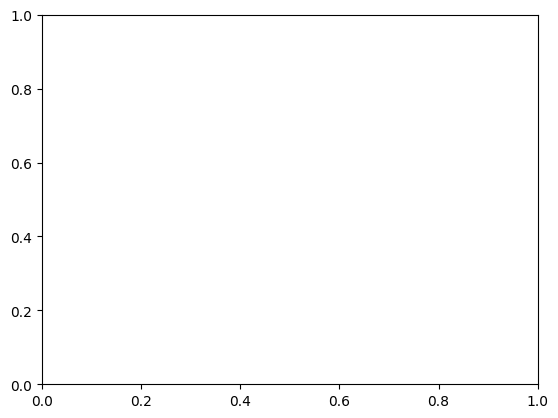

In [142]:
fig, ax = plt.subplots()

Mit den `Axis`-Methoden kann man einen Plot bearbeiten, z.B.
- Daten plotten
- Achsenbeschriftungen
- Titel des Graphen
- Legende einfügen
- Ticks einstellen

## **1. Line Plots**

Line Plots werden verwendet, um kontinuierliche Verläufe einer Größe zu visualisieren. Diese Größen können mathematische Funktionen, Modellkurven oder Zeitreihen sein, die nicht gut als Scatter Plot darstellbar sind. Der entsprechende Befehl ist `.plot()` und nimmt die Daten auf den x- und y-Achsen an.

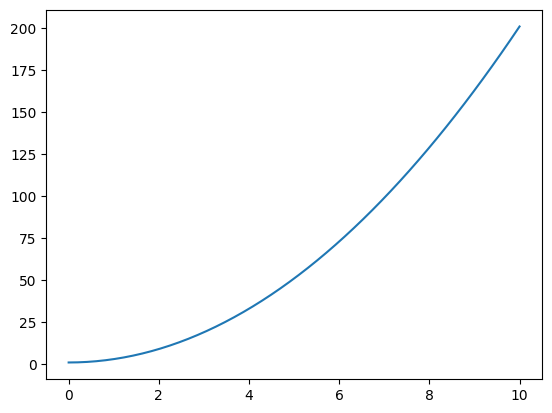

In [143]:
x = np.linspace(0, 10, 50)
y = 2 * x**2 + 1
ax.plot(x, y)
fig # das fig steht hier nur weil matplotlib in notebooks etwas weird ist, in normalen .py skripten schreibt man plt.show()

Da das noch etwas lahm aussieht, fügen wir noch Achsenbeschriftungen (axis labels) und eine Legende ein.

In [144]:
ax.set_xlabel("x", fontsize=15) # setze x-Achsenbeschriftung
ax.set_ylabel("y", fontsize=15) # setze x-Achsenbeschriftung
ax.set_title("my first plot") # setze den Titel
ax.legend(["some line"]) # setze die Legende

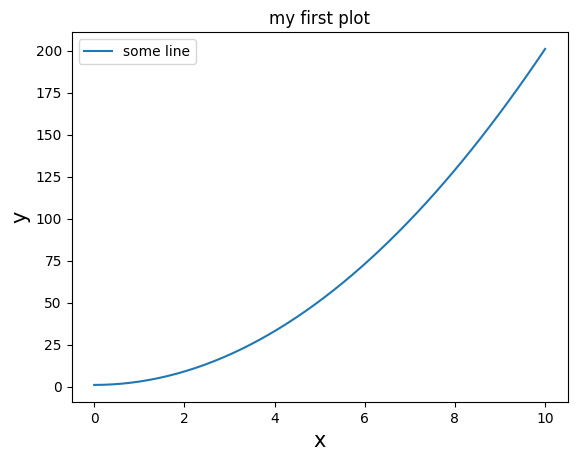

In [145]:
fig

Man kann auch mehrere Kurven hinzufügen indem man den gewünschten Plot einfach als `axis`-Methode aufruft.

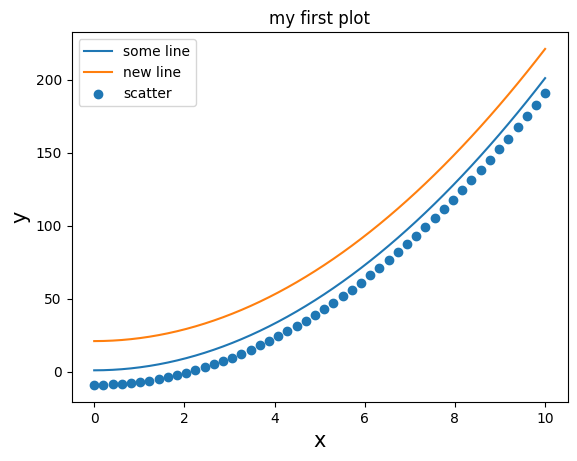

In [146]:
ax.plot(x, y + 20)
ax.scatter(x, y - 10)
ax.legend(["some line", "new line", "scatter"]) # setze die Legende
fig

Es ist aber auch möglich, einen Plot direkt mit `plt.plot()` zu erstellen. Das zugehörige `axis`-Objekt kann dann mit `plt.gca()` abgegriffen werden. Ähnlich verhält es sich mit anderen Graphen wie Scatter- oder Bar-Plots.

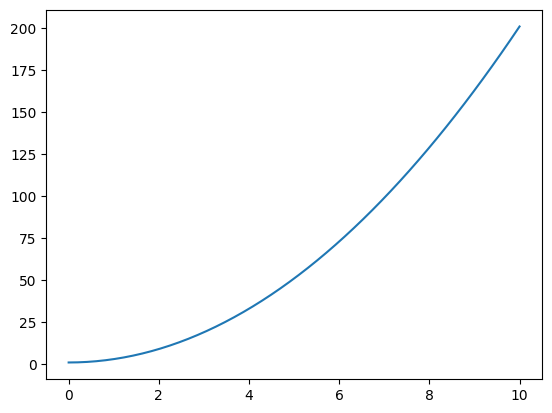

In [147]:
plt.plot(x, y)
ax_generated = plt.gca()

Die `plot`-Methode nimmt verschiedene array-likes an, z.b. Listen, numpy-Arrays oder DataFrame Spalten (Series). Man kann das sogar mischen, d.h. deine x-Werte können eine normale Liste sein, und deine y-Werte eine Spalte aus einem DataFrame.

In [148]:
data_list = [1.0, 2.0, 3.0, 4.0]
data_np_array = np.array([1.0, 2.0, 3.0, 4.0])
data_dataframe = pd.DataFrame({
    "y": [1.0, 2.0, 3.0, 4.0]
    }
)

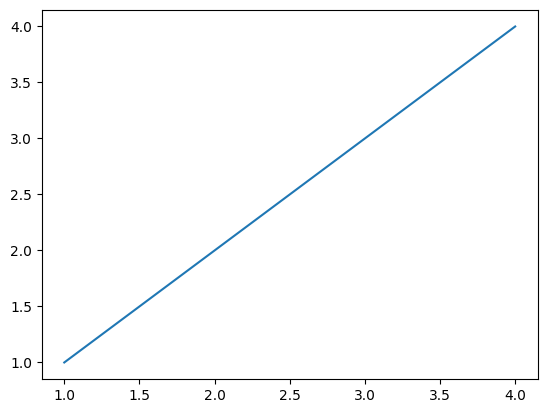

In [149]:
plt.plot(data_list, data_dataframe)

## **2. Scatter Plots**

Scatter Plots sind im Gegensatz zu Line Plots nicht kontinuierlich und enthalten die Daten als einzelne Punkte, die nicht miteinander durch eine Linie verbunden sind. Man verwendet solche Plots oft, um gemessene Daten anzuzeigen oder wenn man wenige Daten hat. Scatter Plots werden mit der `.scatter()`-Methode erstellt.

Text(0.5, 1.0, 'Scatter Plot')

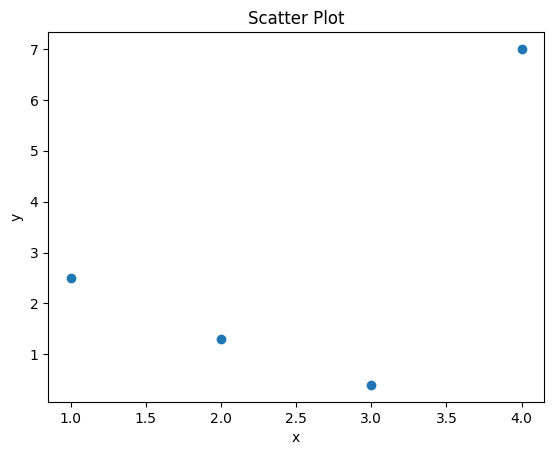

In [150]:
x = [1.0, 2.0, 3.0, 4.0]
y = [2.5, 1.3, 0.4, 7.0]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

## **3. Bar Plots**
Bar Plots bzw. Histogramme verwendet man um Kategorien zu vergleichen. Sie werden mit `.bar()` erstellt.

Text(0.5, 1.0, 'Bar Chart')

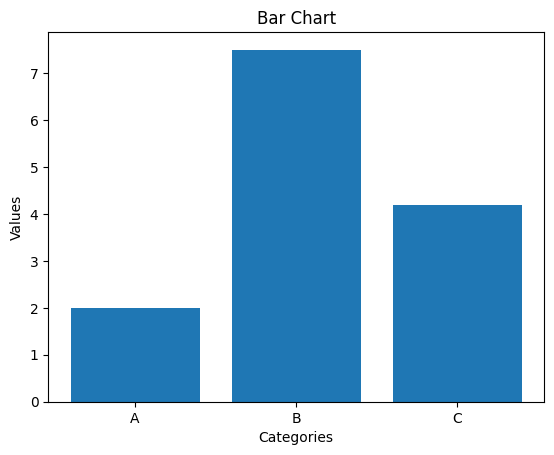

In [151]:
df = pd.DataFrame({
    "Label": ["A", "B", "C"],
    "Value": [2.0, 7.5, 4.2]
    }
)
# Übergebe die Labels als x-Achse und die zugehörigen Werte als y-Werte
plt.bar(df["Label"], df["Value"])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')

## **Aufgabe:** In der Datei `plot_data.csv` findest du einen kleinen Datensatz einer simulierten Messreihe samt Modellvorhersage und Kategorie.
1. Erstelle einen Plot, der sowohl die gemessenen Datenpunkte als auch die Kurve für die Vorhersage enthält.
2. Erstelle ein Diagramm, in dem die Durschnittswerte der Vorhersage für jede Kategorie verglichen wird.